In [1]:
import findspark
findspark.init('C:/spark3')

In [2]:
#pip install --upgrade Pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [4]:
sc = spark.sparkContext

In [5]:
in_text = sc.textFile('tweets.txt')

In [6]:
in_text.collect()

['#UCL',
 '@juventusfc #JuveFCB #ItsTime #UCL',
 '@FCBarcelona @Goalamericas @br_uk #Neymar #Messi #UCL #Barça #FCBworld #FCBlive @Goalamericas',
 '@ChampionsLeague #UCL',
 '@juventusfcen #ItsTime #JuveFCB #UCL',
 '@FutballTweets #UCL',
 '@mterstegen #DesireToWin #UCL',
 '@FOXSoccer #UCL @FS',
 '@Juventusfcar @fcbarcelona_ara #JuveFCB #UCL',
 '@juventusfc @FCBarcelona #JuveFCB #UCL',
 '@juventusfc #ITSTIME #JuveFCB #UCL #FinoAllaFine',
 '@FootbalIStuff #UCL',
 '@mterstegen #DesireToWin #UCL',
 '@FutballTweets #UCL',
 '@ChampionsLeague #UCL',
 '#JuventusBarcellona #UCL',
 '@ChampionsLeague #UCL',
 '@ZDFsport #Tuchel #BVB @BVB #BVBASM @AS_Monaco #UCL',
 '@BarcavsJuventus #JuveFCB #ForçaBarça #UCL #Barca #Juventu',
 '@English_AS #UCL',
 '#JUVFCB #Marciniak #UCL',
 '@FutballTweets #UCL',
 '#UCL',
 '@AllFootballLive #UCL',
 '#juvebarca #juvefcb #uefa #ucl #soccer #italy #finoallefine',
 '@HomeBayern__ #FCBRMA #FCBayern #UCL',
 '@juventusfc #JuveFCB #ItsTime #UCL',
 '#ItsTime #JuveFCB #UCL',

In [7]:
counts = in_text.flatMap(lambda x: x.split(' ')) \
    .filter(lambda x: x.startswith('@')) \
    .map(lambda x: (x, 1)) \
    .reduceByKey(lambda x, y: x+y)

In [8]:
counts.collect()

[('@juventusfc', 697),
 ('@Goalamericas', 4),
 ('@juventusfcen', 269),
 ('@FutballTweets', 30),
 ('@mterstegen', 168),
 ('@FOXSoccer', 51),
 ('@FS', 42),
 ('@fcbarcelona_ara', 10),
 ('@FootbalIStuff', 50),
 ('@AS_Monaco', 105),
 ('@English_AS', 6),
 ('@HomeBayern__', 1),
 ('@BVB_OMA', 6),
 ('@Uefaworld', 48),
 ('@Todo_atleti', 20),
 ('@Nissan_ESP', 24),
 ('@GarethBale', 68),
 ('@SerieA_TIM', 18),
 ('@Sondage_foot_fr', 1),
 ('@marca', 34),
 ('@UCL_TV', 1),
 ('@btsportfootball', 10),
 ('@GobboOfficial', 3),
 ('@Syafiquevic', 1),
 ('@Bpt', 15),
 ('@LCFC', 10),
 ('@OmnisportNews', 1),
 ('@OptaPaolo', 1),
 ('@BETDAQ', 1),
 ('@sabrina_amadori', 1),
 ('@DiMarzio', 11),
 ('@Dvilofficial', 1),
 ('@YouTube', 3),
 ('@FCBayernES', 6),
 ('@realmadrid', 8),
 ('@Cuadrado', 11),
 ('@JuventusGO', 1),
 ('@carrusel', 1),
 ('@javiherraez', 2),
 ('@MartaMoralesL', 1),
 ('@UEFAcomPaoloM', 11),
 ('@BVB_Goleador', 2),
 ('@ellie_kazan', 1),
 ('@CoFutboleros', 2),
 ('@MarcinNowak', 1),
 ('@pslojkowski', 1),
 ('

In [10]:
counts_filtered = counts.filter(lambda x: x[1] > 10)

In [11]:
counts_filtered.collect()

[('@juventusfc', 697),
 ('@juventusfcen', 269),
 ('@FutballTweets', 30),
 ('@mterstegen', 168),
 ('@FOXSoccer', 51),
 ('@FS', 42),
 ('@FootbalIStuff', 50),
 ('@AS_Monaco', 105),
 ('@Uefaworld', 48),
 ('@Todo_atleti', 20),
 ('@Nissan_ESP', 24),
 ('@GarethBale', 68),
 ('@SerieA_TIM', 18),
 ('@marca', 34),
 ('@Bpt', 15),
 ('@DiMarzio', 11),
 ('@Cuadrado', 11),
 ('@UEFAcomPaoloM', 11),
 ('@FoootyPolls', 11),
 ('@fcbarcelona_fra', 11),
 ('@Atleti', 12),
 ('@Juventus_VEN', 34),
 ('@SCTVSports', 11),
 ('@LigadeCampeones', 35),
 ('@liveSport', 18),
 ('@SonyXperiaFR', 20),
 ('@UltraSuristic_', 29),
 ('@rotabet', 137),
 ('@realmadridarab', 27),
 ('@FCBarcelona', 231),
 ('@ChampionsLeague', 341),
 ('@Juventusfcar', 47),
 ('@BVB', 271),
 ('@AllFootballLive', 49),
 ('@BBCSport', 11),
 ('@chiellini', 62),
 ('@bonucci_leo', 71),
 ('@Atletico_MD', 12),
 ('@FCBarcelona_es', 58),
 ('@aftgomes', 29),
 ('@YannickBolasie', 11),
 ('@UclArabic', 62),
 ('@LuisSuarez', 99),
 ('@neymarjr', 102),
 ('@AS_Monaco_E

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import os

In [13]:
counts_dict = dict(counts_filtered.collect())

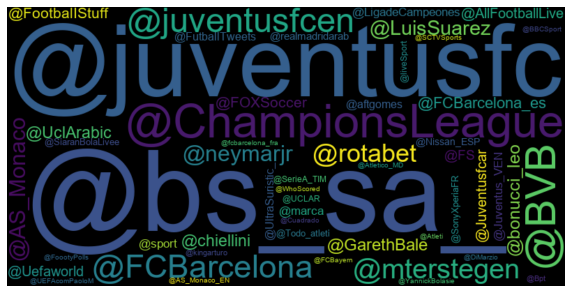

In [15]:
#FILE = r'C:\Users\Sanjit Kolla\Machine Learning'
#font_path = os.environ.get('FONT_PATH', os.path.join(FILE, 'DroidSansMono.ttf'))
#font_path = os.path.abspath('arial/font.ttf')
wordcloud = WordCloud(background_color='black', width=800, height=400, font_path="./arial.ttf").generate_from_frequencies(counts_dict)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
#font_path = os.path.abspath('arial/font.ttf')
#print(font_path)

C:\Users\Sanjit Kolla\Machine Learning\arial\font.ttf


In [16]:
counts_dict = dict(counts.collect())

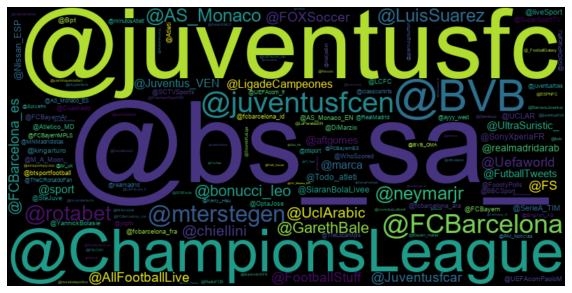

In [17]:
#FILE = r'C:\Users\Sanjit Kolla\Machine Learning'
#font_path = os.environ.get('FONT_PATH', os.path.join(FILE, 'DroidSansMono.ttf'))
#font_path = os.path.abspath('arial/font.ttf')
wordcloud = WordCloud(background_color='black', width=800, height=400, font_path="./arial.ttf").generate_from_frequencies(counts_dict)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()